In [8]:
import seaborn as sns

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

california_data = fetch_california_housing()
X = pd.DataFrame(california_data.data, columns=california_data.feature_names)
y = california_data.target

In [2]:
print(X.info())
print(X.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


As observable in the result above, there are no missing data.

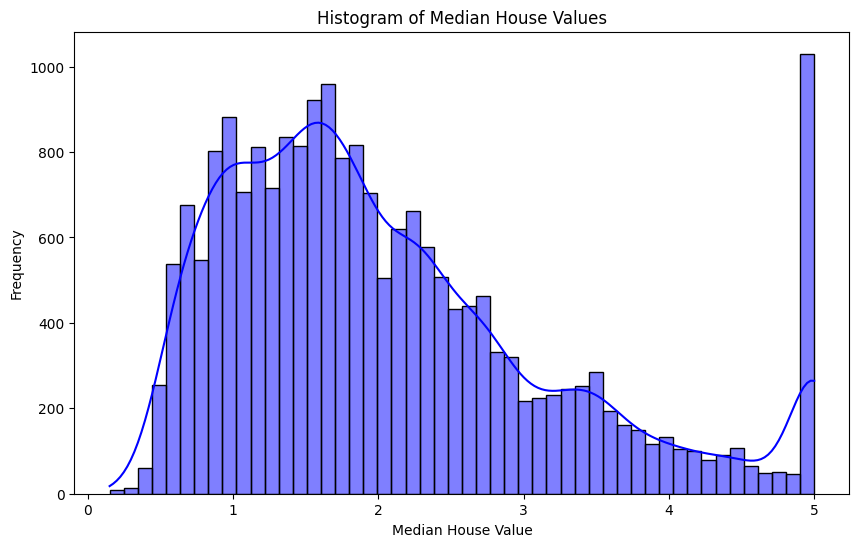

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(y, bins=50, kde=True, color='blue')
plt.title('Histogram of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

From the histogram of median house values, we can observe several key characteristics of the housing market in this dataset. The distribution of house values is skewed to the right, indicating that there are more areas with lower median house values than there are with higher values. Most of the houses fall within a value range of around 0.5 to 2.5 (presumably in hundreds of thousands of dollars, but the exact unit is not specified on the x-axis). There is a significant spike at the higher end of the scale, around the value of 5, which suggests a cap on the house values in the dataset.

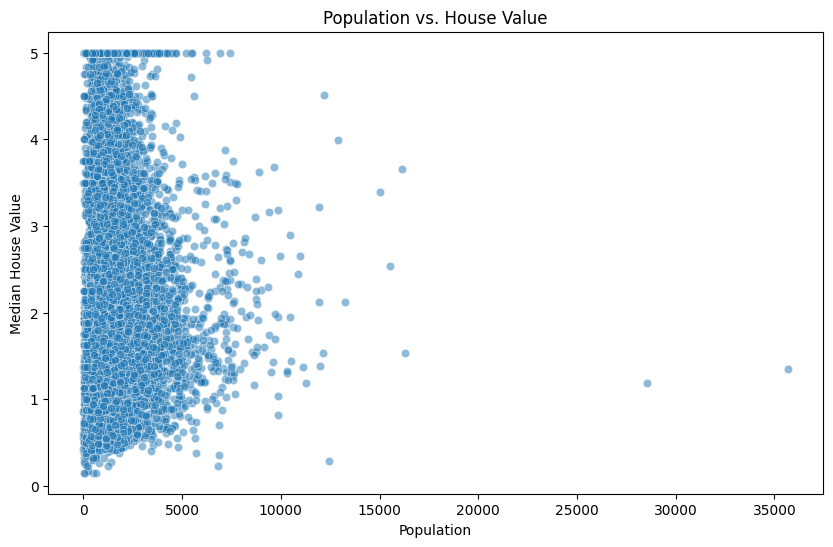

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population', y=y, data=X, alpha=0.5)
plt.title('Population vs. House Value')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.show()

It displays a concentration of data points along the lower end of the population axis, indicating that most of the districts have smaller populations. The median house values are mostly clustered around the lower to mid-range of the y-axis, with a noticeable ceiling at the value of 5, consistent with the earlier histogram. There isn't a clear or strong trend indicating that house values increase or decrease with the population. Instead, there's a wide dispersion of house values for populations up to about 10,000. For areas with larger populations (over 10,000), the house values tend to not exceed a value of 3, suggesting that larger populations are not necessarily associated with higher median house values. Additionally, there are outliers with very high populations compared to most other districts, but these do not show correspondingly high median house values.

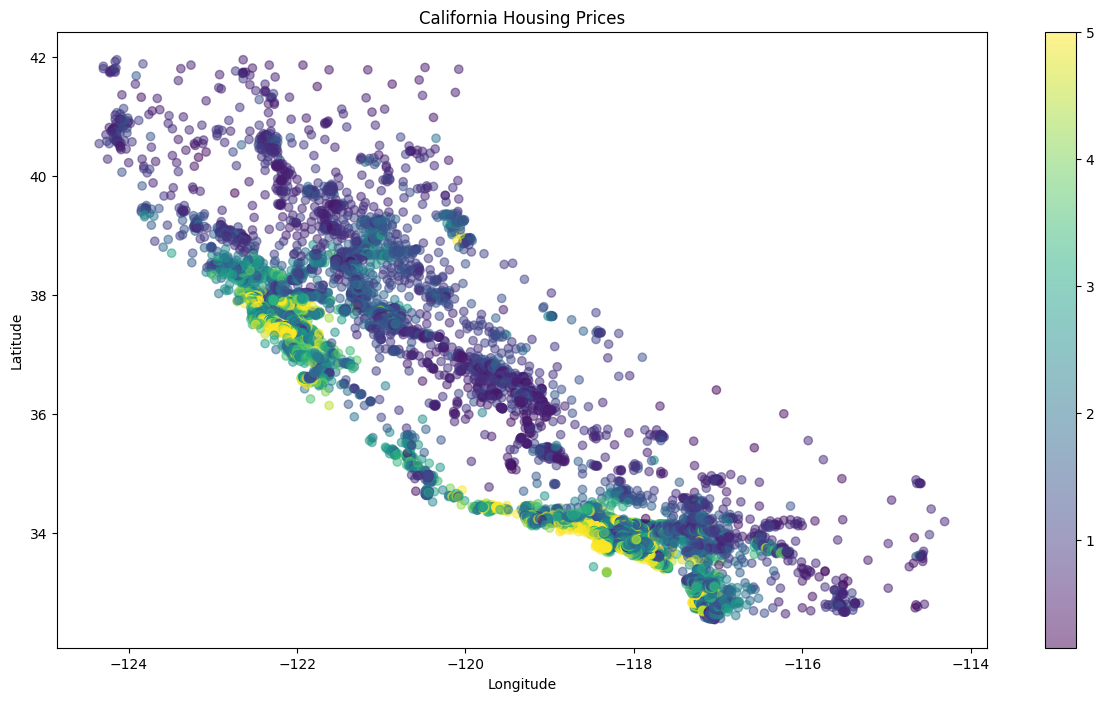

In [7]:
plt.figure(figsize=(15,8))
sc = plt.scatter(X['Longitude'], X['Latitude'], c=y, cmap='viridis', alpha=0.5)
plt.colorbar(sc)
plt.title('California Housing Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The coastlines, particularly in the Bay Area and around Los Angeles, show higher housing values (yellow to green colors), suggesting these areas are more expensive. In contrast, the central valley and the northeastern part of the state, away from the coast, exhibit lower house values (darker colors).

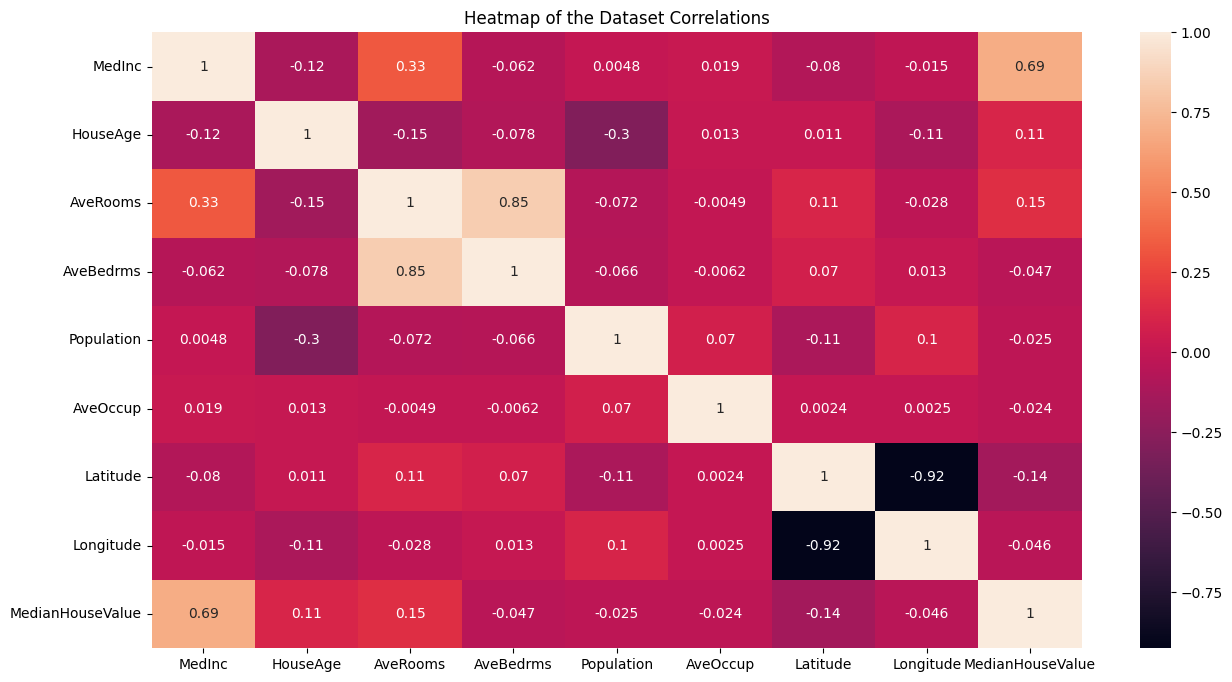

In [20]:
X_combined = X.copy()
X_combined['MedianHouseValue'] = y

corr = X_combined.corr()

plt.figure(figsize=(15, 8))

sns.heatmap(corr, annot=True)
plt.title('Heatmap of the Dataset Correlations')
plt.show()

The strongest positive correlation is between median income (MedInc) and median house value, which suggests that areas with higher incomes tend to have more expensive houses. There are also notable, but weaker, positive correlations between house value and the average number of rooms (AveRooms), indicating that larger houses (which likely have more rooms) are more expensive. Interestingly, there is a significant negative correlation between latitude and median house value, indicating that as we move north (higher latitude), house values tend to decrease. Longitude also has a negative correlation, though it's not as strong as latitude. This could be due to geographic and economic factors unique to California, such as the concentration of wealth in certain southern and coastal areas

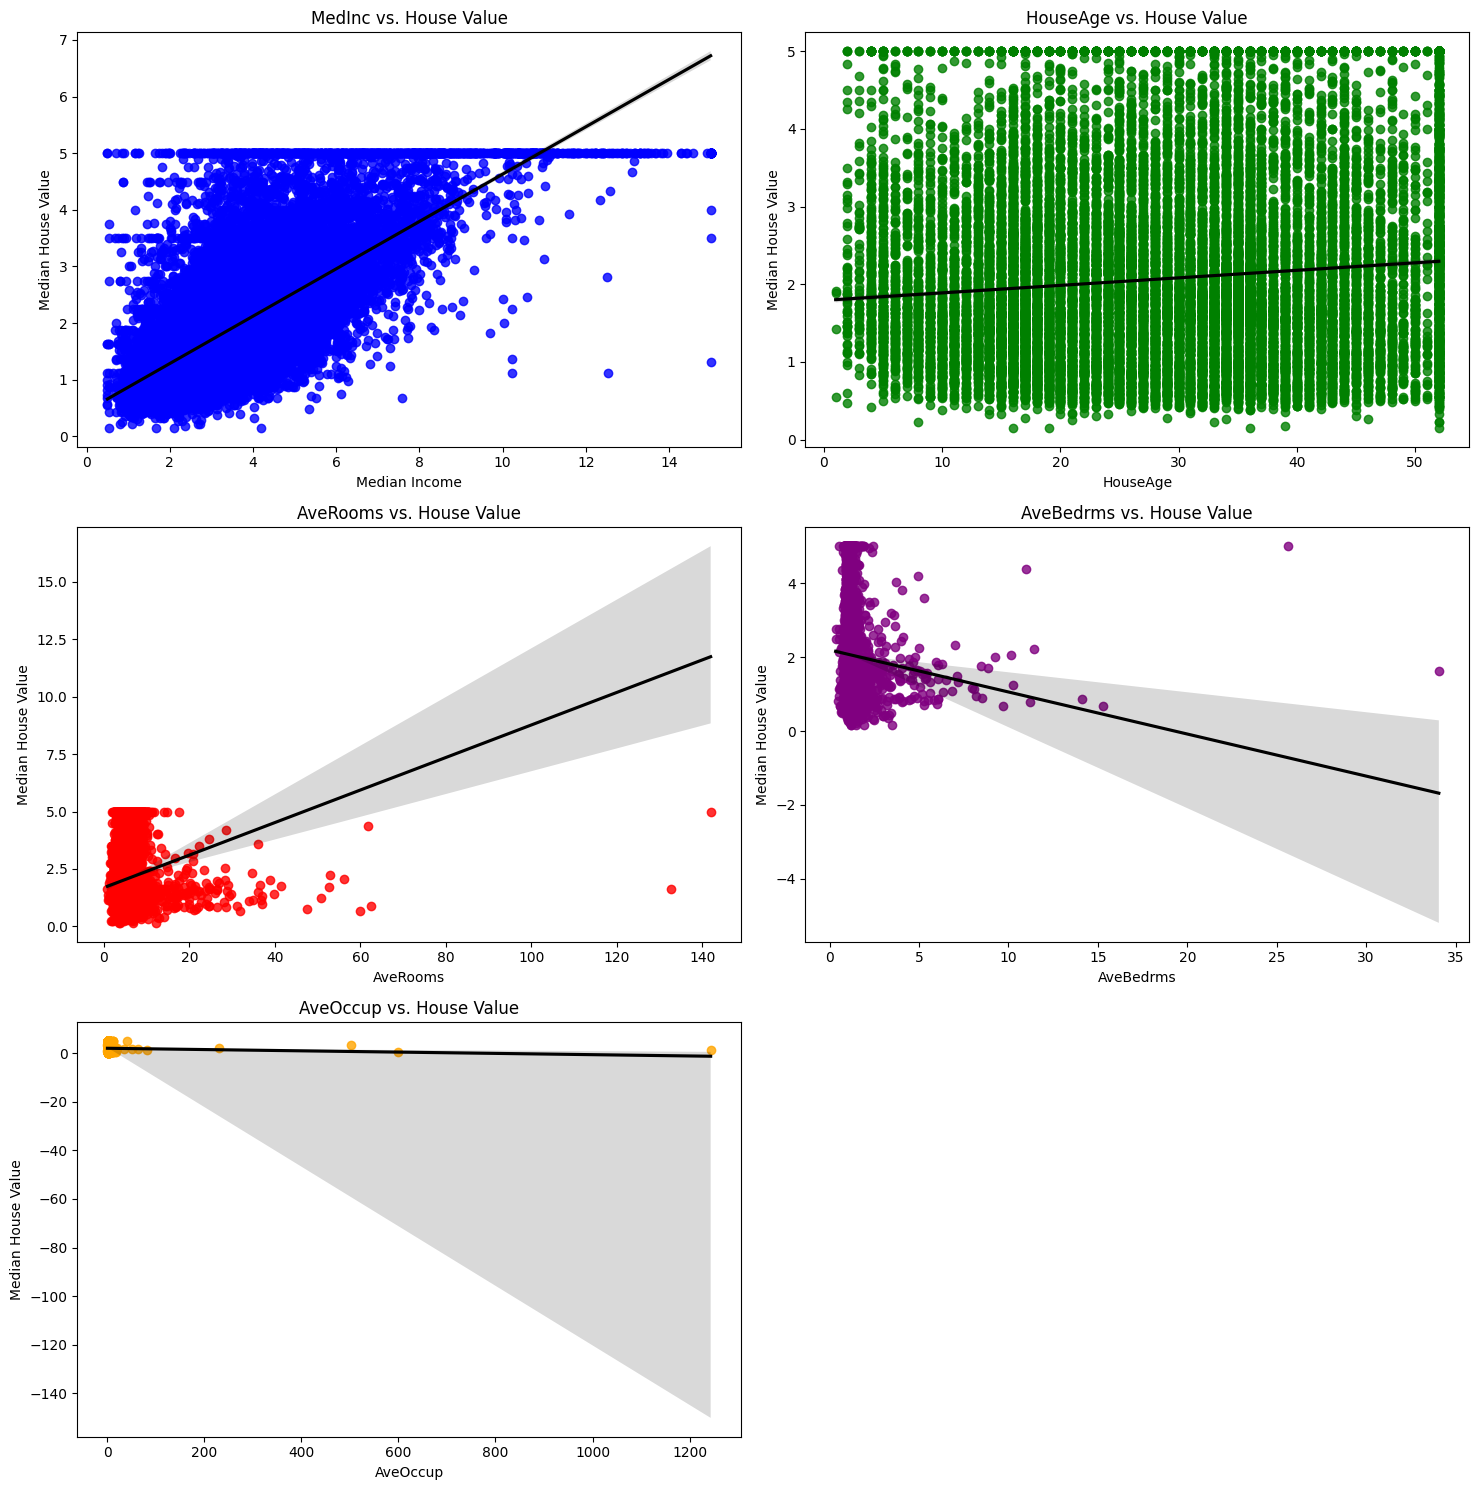

In [25]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs = axs.flatten()

features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup']
colors = ['blue', 'green', 'red', 'purple', 'orange']

for i, feature in enumerate(features):
    sns.regplot(x=feature, y='MedianHouseValue', data=X_combined, ax=axs[i], color=colors[i], line_kws={"color": "black"})
    axs[i].set_title(f'{feature} vs. House Value')
    axs[i].set_xlabel('Median Income' if feature == 'MedInc' else feature)
    axs[i].set_ylabel('Median House Value')

plt.tight_layout()

if len(axs) > len(features):
    fig.delaxes(axs[-1])

plt.show()


The scatter plots with trend lines show the relationships between different features of the housing data and the median house value. The plot for Median Income (MedInc) vs. House Value indicates a strong positive correlation, meaning as median income increases, so does the house value. The House Age plot suggests a very weak correlation with house value, implying that the age of houses doesn't significantly affect their value. For the Average Number of Rooms (AveRooms), there's a positive trend showing that more rooms may lead to higher house values, although there are outliers with many rooms but not correspondingly high house values. The plot for Average Number of Bedrooms (AveBedrms) also displays a positive trend but with a lot of data spread, indicating other factors might affect house values as well. The scatter plot for Average Occupancy (AveOccup) shows a cluster of data with low occupancy values and a few extreme outliers; the trend line indicates a weak negative correlation, suggesting higher occupancy does not necessarily correlate with higher house value. These outliers, especially in the AveRooms, AveBedrms, and AveOccup plots, highlight the existence of extreme values that could be anomalies or special cases in the data.







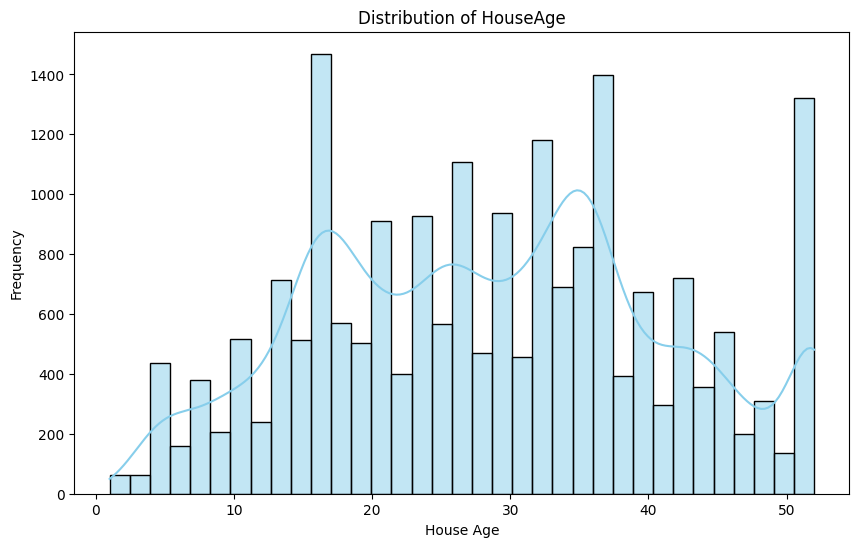

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(X['HouseAge'], kde=True, color="skyblue", bins=35)
plt.title('Distribution of HouseAge')
plt.xlabel('House Age')
plt.ylabel('Frequency')
plt.show()

The histogram with the kernel density estimate (KDE) curve for the HouseAge feature shows a distribution with several peaks, which indicates that certain house ages are more common within the dataset. For instance, there's a noticeable peak around the 10-year mark, another around 25 years, and a significant peak at 50 years. The presence of a peak at 50 years could suggest a large number of houses at the maximum age recorded or a capping of the data at this value. The spread of the data suggests a wide range of house ages within the dataset, with a slight right skew indicating a larger number of older houses. The KDE curve smooths these peaks and valleys, giving a clearer picture of the underlying distribution's shape, and emphasizes the multimodal nature of the distribution of house ages.








In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

mlp_regressor = MLPRegressor(hidden_layer_sizes=(130, 64, 32, 16), activation='relu', random_state=42)
mlp_regressor.fit(X_train, y_train)

predictions = mlp_regressor.predict(X_test)

r2 = r2_score(y_test, predictions)
print(f'R2 Score: {r2}')


R2 Score: 0.7913321095070424


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


An R^2 score of 0.791 indicates that the model explains approximately 79.1% of the variance in the target variable, which can be considered quite good in many contexts. However, performance ultimately depends on the specific requirements of your application and whether this level of prediction accuracy meets those needs, so this could be improved.

In [33]:
parameter_space = {
    'hidden_layer_sizes': [(100, 50), (120, 60)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant'],
}

mlp_gs = GridSearchCV(MLPRegressor(random_state=42, early_stopping=True), parameter_space, n_jobs=-1, cv=3)
mlp_gs.fit(X_train, y_train)

print('Best parameters found:', mlp_gs.best_params_)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (120, 60), 'learning_rate': 'constant', 'solver': 'adam'}


In [62]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder

iris_data = load_iris()
X_iris = iris_data.data
y_iris = iris_data.target

scaler_iris = StandardScaler()
X_iris_scaled = scaler_iris.fit_transform(X_iris)

encoder = OneHotEncoder(sparse=False)
y_iris_encoded = encoder.fit_transform(y_iris.reshape(-1, 1))

iris_features_df = pd.DataFrame(X_iris_scaled, columns=iris_data.feature_names)
iris_target_df = pd.DataFrame(y_iris_encoded, columns=encoder.get_feature_names_out())

iris_combined_df = pd.concat([iris_features_df, iris_target_df], axis=1)

basic_statistics = iris_combined_df.describe()

general_info = iris_combined_df.info()
missing_values = iris_combined_df.isnull().sum()

print(basic_statistics)
print(missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   x0_0               150 non-null    float64
 5   x0_1               150 non-null    float64
 6   x0_2               150 non-null    float64
dtypes: float64(7)
memory usage: 8.3 KB
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02       1.500000e+02   
mean       -1.468455e-15     -1.823726e-15      -1.610564e-15   
std         1.003350e+00      1.003350e+00       1.003350e+00   
min        -1.870024e+00     -2.433947e+00      -1.567576e+00   
25%        -9.006812e-01     -5.923730e-01      -1.226552e+00   
50%        -5.250608e-02     -1.31

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


As observable in the result above, there are no missing data.

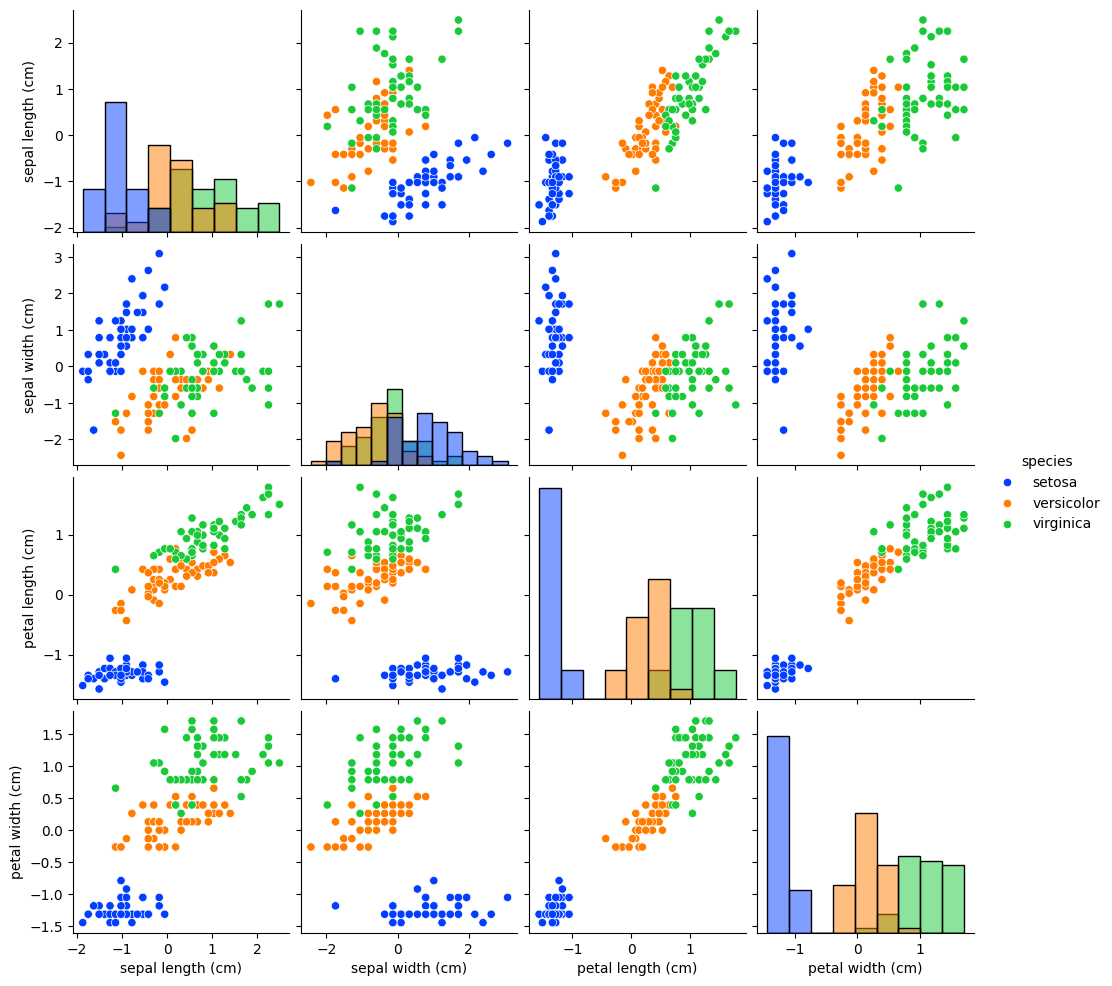

In [63]:
iris_features_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

pairplot = sns.pairplot(iris_features_df, hue='species', palette='bright', diag_kind='hist', kind='scatter')

plt.show()

The pairplot of the Iris dataset reveals distinct clusters among the three iris species based on the combination of features. In particular, the scatter plots show that Iris setosa is well-separated from the other two species across all feature combinations, which suggests that these features are very effective for distinguishing setosa from versicolor and virginica. The plots of petal length and petal width demonstrate the clearest divisions among species, indicating these may be the most discriminative features.

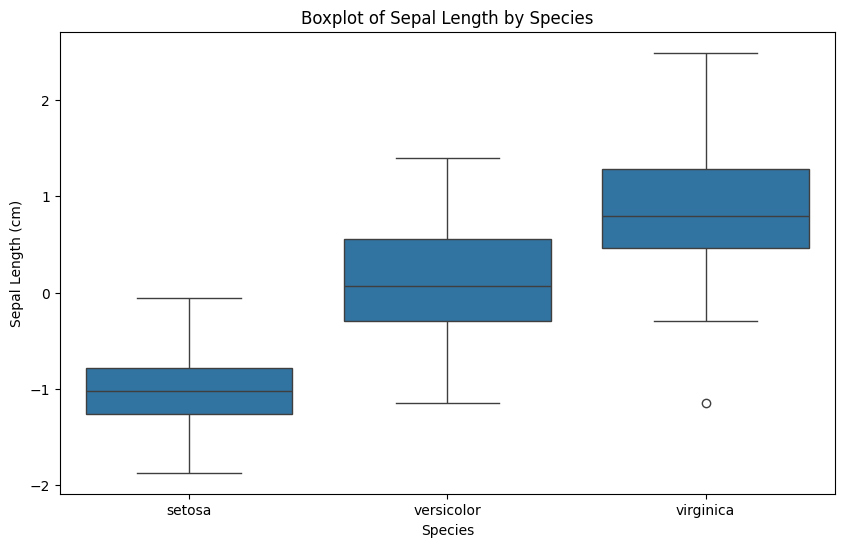

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal length (cm)', data=iris_features_df)

plt.title('Boxplot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

Iris setosa tends to have a shorter sepal length, with a tight interquartile range indicating low variability within this species. Iris versicolor has a medium range of sepal lengths with a slightly higher variability than setosa. Iris virginica has the longest sepals on average, with the widest interquartile range, suggesting more variability in sepal length within this species

<ipython-input-58-3a246e0706d7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='sepal width (cm)', data=iris_features_df, palette="colorblind")  # Using a colorblind-friendly palette


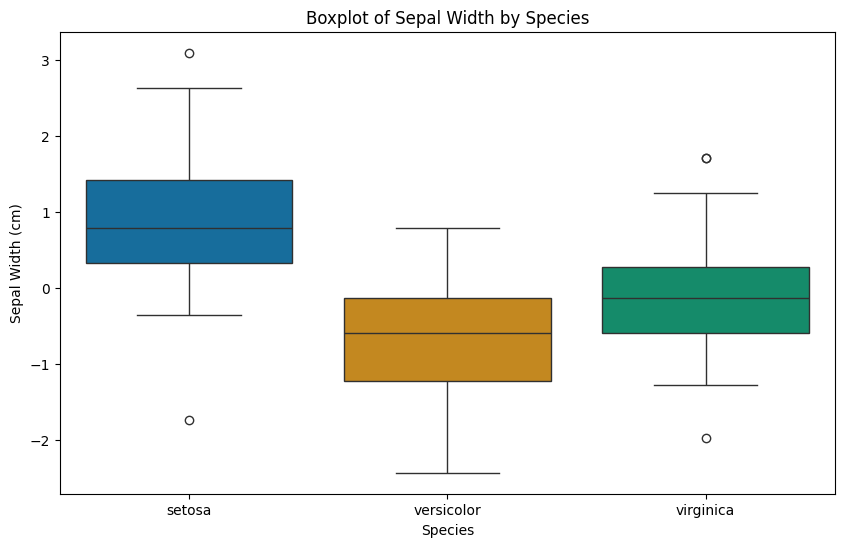

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal width (cm)', data=iris_features_df, palette="colorblind")  # Using a colorblind-friendly palette

plt.title('Boxplot of Sepal Width by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')
plt.show()

The boxplot of sepal width by species shows the distribution of sepal widths for the three Iris species. Iris setosa generally has wider sepals than the other two species, as indicated by the higher median and larger interquartile range. Iris versicolor and Iris virginica have similar median sepal widths, but virginica tends to have a wider range of measurements, as seen by the longer box and whiskers, suggesting greater variability in sepal width.

<ipython-input-59-09fd7fd0bc48>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='petal length (cm)', data=iris_features_df, palette="colorblind")  # Using a colorblind-friendly palette


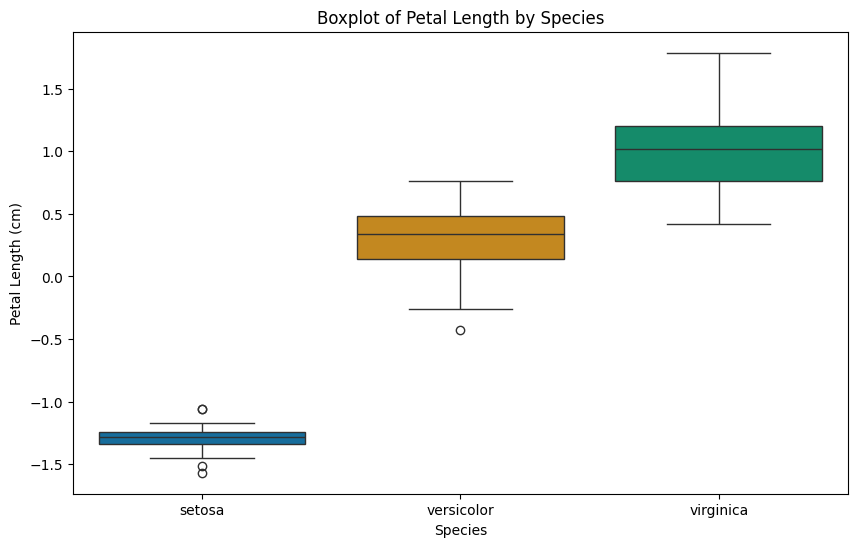

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal length (cm)', data=iris_features_df, palette="colorblind")  # Using a colorblind-friendly palette

plt.title('Boxplot of Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

In [64]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# Splitting the data into features and labels
X = iris_features_df.drop(columns=['species'])
y = iris_features_df['species']

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Creating the neural network classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), activation='relu', random_state=42)

# Fitting the classifier on the training data
mlp_classifier.fit(X_train, y_train)

# Making predictions on the test data
predictions = mlp_classifier.predict(X_test)

# Calculating the mean accuracy of the model
accuracy = accuracy_score(y_test, predictions)

print("Mean Accuracy:", accuracy)

Mean Accuracy: 1.0


A mean accuracy of 1.0 indicates that the model achieved perfect accuracy on the test data, which is ideal but suspicious.

In [65]:
param_grid = {
    'hidden_layer_sizes': [(256,), (256, 128), (256, 128, 64), (256, 128, 64, 32)],
    'activation': ['relu', 'tanh', 'logistic']
}

grid_search = GridSearchCV(estimator=MLPClassifier(random_state=42), param_grid=param_grid, cv=3)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_
best_predictions = best_model.predict(X_test)

best_accuracy = accuracy_score(y_test, best_predictions)
print("Mean Accuracy with Best Model:", best_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (256,)}
Mean Accuracy with Best Model: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


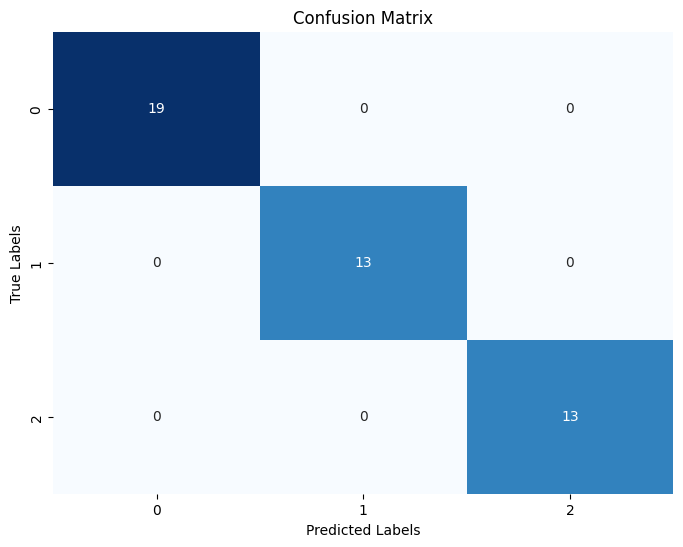

In [67]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

We can see that the classifier has done an excellent job. It has correctly predicted all the instances without any misclassifications. There are 19 instances of class 0, 13 instances of class 1, and 13 instances of class 2 that were all correctly identified. There are no off-diagonal numbers, which indicates there were no false positives or false negatives.